# INTRODUCTION
`Unemployment` and `underemployment` remain critical challenges in economic planning, particularly among the youth demographics. While raw demographic survey data exists, there is a lack of granular insight into how age distribution, educational attainment (ISCED classification), and residence type (Urban/Rural) intersect to influence labor force participation. This analysis seeks to transform raw microdata into actionable insights to identify vulnerable demographic groups, characterize the 'youth bulge,' and evaluate the correlation between education levels and employment outcomes.
* The government has been at the forefront of efforts to reduce poverty in all its forms, in alignment with SDG Goal 1, which prioritizes poverty eradication.


# Data Description.
The Kenya National Bureau of Statistics has been conducting the quarterly Kenya Household Continuous Survey (KCHS) since 2019.
 
 The data used here is from Kenya Continuous Household Survey Prorgramme 2022 Sample survey data [ssd] obtained by the Kenya National Bureau of Statistics. The survey covered the selected households from the Kenyan Sample Frame.

# Objectives
1. To assess Age Distribution vs Education levels in Kenya.
2. To Analyse Education levels in the Kenyan population.
3. To determine the time periods of acquiring the bachelors degree in Kenya,

In [1]:
# import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

import warnings

# Filter out the specific Pandas FutureWarning
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:

#  SETUP: Define file names
zip_filename = 'Household_Information_Data.zip'  
csv_filename = 'individual_data.csv' 

#  UNZIP THE FILE

print(f"Unzipping {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    # Extract all files to the current folder
    zip_ref.extractall()
    
    # Get a list of all files inside the zip so we can find the .dta one automatically
    extracted_files = zip_ref.namelist()

# 3. FIND THE .DTA FILE AUTOMATICALLY
# Loop through extracted files to find the one ending in .dta
dta_file = None
for file in extracted_files:
    if file.lower().endswith('.dta'):
        dta_file = file
        break

if dta_file:
    print(f"Found Stata file: {dta_file}")
    
    # CONVERT .DTA TO .CSV
    # Read the Stata file
    # convert_categoricals=False keeps the codes (e.g., 1, 2) instead of labels (Male, Female)
    df = pd.read_stata(dta_file, convert_categoricals=True)
    
    # Save to CSV
    df.to_csv(csv_filename, index=False)
    
    print(f"Success! Saved as {csv_filename}")

else:
    print("Error: No .dta file was found inside the zip.")

Unzipping Household_Information_Data.zip...
Found Stata file: Individual_Data.dta
Success! Saved as individual_data.csv


# 1. Performing EDA .

In [3]:
# information concerning our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80889 entries, 0 to 80888
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   interview__key            80889 non-null  object  
 1   interview__id             80889 non-null  object  
 2   a01                       80889 non-null  category
 3   hhid__id                  80889 non-null  int8    
 4   b02_1                     80889 non-null  category
 5   b03                       80889 non-null  category
 6   b03_other                 80889 non-null  object  
 7   b04                       80889 non-null  category
 8   b05_years                 80889 non-null  category
 9   b05_yrofbirth             80881 non-null  float64 
 10  b05_monthofbirth          80886 non-null  category
 11  b05_day                   80284 non-null  category
 12  age_cur                   80835 non-null  float64 
 13  b06                       51389 non-null  cate

* From above, our data is a large one with 96 columns and 80,888 rows.
* addition it occupies 19.8 MB storage.

In [4]:
#Obtain a description of the data
df.describe()

,hhid__id,b05_yrofbirth,age_cur,b09_4,b13_3,b13_5,b02_length,inw,dsb_aggregate_un,diff_sight,...,diff_rem_any,diff_self_care_any,diff_comm_any,dummy,age_cat,wap_1,youth_age,youth_age_k,hhsize,wap
count,80889.000000,80881.000000,80835.000000,12879.000000,23165.000000,4459.000000,80889.000000,80889.000000,0.0,80889.000000,...,80889.000000,80889.000000,80889.000000,70730.0,80889.000000,47366.0,16685.0,22389.0,80889.000000,70730.0
mean,3.127273,1998.123107,25.135337,2011.617284,34.043082,646.874187,5.121735,636.991211,NaN,0.006255,...,0.004735,0.006280,0.001817,1.0,25.340206,1.0,1.0,1.0,5.121735,1.0
std,2.070632,21.919731,54.499308,12.696618,162.029226,1877.383303,2.380619,570.212830,NaN,0.078833,...,0.068659,0.078976,0.042570,0.0,19.640110,0.0,0.0,0.0,2.380619,0.0
min,1.000000,0.000000,-9998.000000,1945.000000,0.000000,0.000000,1.000000,8.387177,NaN,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,1.0,1.0,1.0,1.000000,1.0
25%,1.000000,1986.000000,10.000000,2007.000000,10.000000,0.000000,4.000000,239.806244,NaN,0.000000,...,0.000000,0.000000,0.000000,1.0,10.000000,1.0,1.0,1.0,4.000000,1.0
50%,3.000000,2003.000000,20.000000,2016.000000,20.000000,30.000000,5.000000,524.262390,NaN,0.000000,...,0.000000,0.000000,0.000000,1.0,20.000000,1.0,1.0,1.0,5.000000,1.0
75%,4.000000,2014.000000,37.000000,2021.000000,30.000000,150.000000,6.000000,863.093323,NaN,0.000000,...,0.000000,0.000000,0.000000,1.0,37.000000,1.0,1.0,1.0,6.000000,1.0
max,18.000000,2024.000000,2024.000000,2024.000000,8000.000000,30000.000000,18.000000,10607.880859,NaN,1.000000,...,1.000000,1.000000,1.000000,1.0,120.000000,1.0,1.0,1.0,18.000000,1.0


* It seems we cant yet find the necessary info. Too much unrequired columns.

In [5]:
# Calculating the total no. of missing values in each of the columns.
df.isnull().sum().sort_values(ascending=False).head(20)

dsb_aggregate_un    80889
b09_2               80636
disability_d        79395
b13_4               76557
b13_5               76430
b09_7               68014
b09_6               68013
b09_5               68012
b09_4               68010
youth_age           64204
hhh_sex             59603
youth_age_k         58500
agey                58500
b13_2               58189
b13_3               57724
age_group           55962
b13_1               51854
b12                 51849
b14_2               44577
wap_1               33523
dtype: int64

### Exploring more columns
* This section aims a exploring more columns so as to narrow down to the necessary columns.

In [6]:
# Lets have a glimpse at the columns associated with disability.
df_dis = df[["b02_length","inw","dif_sight","dif_hear","diff_walk","diff_rem","dif_care","dif_comm","dsb_details",
              "dsb_aggregate","dsb_aggregate_un","diff_sight","diff_sight_any","diff_hear_any","diff_walk_any","diff_rem_any",
              "diff_rem_any","diff_self_care_any","diff_comm_any","any_disability","disability_d","disability_status_unique",
              "dis_age"]]
df_dis.head()

,b02_length,inw,dif_sight,dif_hear,diff_walk,diff_rem,dif_care,dif_comm,dsb_details,dsb_aggregate,...,diff_hear_any,diff_walk_any,diff_rem_any,diff_rem_any,diff_self_care_any,diff_comm_any,any_disability,disability_d,disability_status_unique,dis_age
0,6.0,983.762817,No - no difficulty,No - no difficulty,0.0,0.0,No - no difficulty,No - no difficulty,"1 - No, no difficulty",1 - Persons without disability,...,0.0,0.0,0.0,0.0,0.0,0.0,No disability,NaN,2 - Persons without disability,4
1,5.0,1243.113892,No - no difficulty,No - no difficulty,0.0,0.0,No - no difficulty,No - no difficulty,"1 - No, no difficulty",1 - Persons without disability,...,0.0,0.0,0.0,0.0,0.0,0.0,No disability,NaN,2 - Persons without disability,1
2,3.0,786.825134,No - no difficulty,No - no difficulty,0.0,0.0,No - no difficulty,No - no difficulty,"1 - No, no difficulty",1 - Persons without disability,...,0.0,0.0,0.0,0.0,0.0,0.0,No disability,NaN,2 - Persons without disability,0
3,5.0,880.786865,No - no difficulty,No - no difficulty,0.0,0.0,No - no difficulty,No - no difficulty,"1 - No, no difficulty",1 - Persons without disability,...,0.0,0.0,0.0,0.0,0.0,0.0,No disability,NaN,2 - Persons without disability,2
4,5.0,1184.576782,No - no difficulty,No - no difficulty,0.0,0.0,No - no difficulty,No - no difficulty,"1 - No, no difficulty",1 - Persons without disability,...,0.0,0.0,0.0,0.0,0.0,0.0,No disability,NaN,2 - Persons without disability,4


In [7]:

df_b = df[['b03_other', 'b04', 'b05_years', 'b05_yrofbirth', 'b05_monthofbirth',
       'b05_day', 'age_cur', 'b06', 'b07', 'b08_1', 'b08_2', 'b08_3', 'b08_4',
       'b08_5', 'b08_6', 'b09_1', 'b09_2', 'b09_3', 'b09_4', 'b09_5', 'b09_6',
       'b09_7', 'b09_7other', 'b10', 'b11', 'b12', 'b12_other', 'b13',
       'b13_other', 'b13_1', 'b13_2', 'b13_2_other', 'b13_3', 'b13_4', 'b13_5',
       'b14_1', 'b14_2', 'b14_3', 'b14_4']]
df_b.head()

,b03_other,b04,b05_years,b05_yrofbirth,b05_monthofbirth,b05_day,age_cur,b06,b07,b08_1,...,b13_1,b13_2,b13_2_other,b13_3,b13_4,b13_5,b14_1,b14_2,b14_3,b14_4
0,,Male,4,2020.0,FEBRUARY,11.0,4.0,NaN,ORTHODOX,No - no difficulty,...,NaN,NaN,,NaN,NaN,NaN,No,No,No,No
1,,Male,1,2022.0,JULY,19.0,1.0,NaN,EVANGELICAL CHURCHES,No - no difficulty,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,Male,0,2023.0,MAY,7.0,0.0,NaN,OTHER CHRISTIAN,No - no difficulty,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,Male,2,2021.0,MAY,5.0,2.0,NaN,PROTESTANT,No - no difficulty,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,Male,4,2020.0,MARCH,30.0,4.0,NaN,EVANGELICAL CHURCHES,No - no difficulty,...,9000.0,School bus,,15.0,Per Term,20000.0,No,Yes,Yes,Yes


In [8]:
# Exploring more columns
df_b2 = df[['b08_1', 'b08_2', 'b08_3', 'b08_4',
       'b08_5', 'b08_6', 'b09_1', 'b09_2', 'b09_3', 'b09_4', 'b09_5', 'b09_6',
       'b09_7', 'b09_7other', 'b10', 'b11', 'b12', 'b12_other', 'b13',
       'b13_other']]
df_b2.head()            

,b08_1,b08_2,b08_3,b08_4,b08_5,b08_6,b09_1,b09_2,b09_3,b09_4,b09_5,b09_6,b09_7,b09_7other,b10,b11,b12,b12_other,b13,b13_other
0,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,Mombasa,NaN,Always/Never Moved,NaN,NaN,NaN,NaN,,No,NaN,NaN,,NaN,
1,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,Mombasa,NaN,Always/Never Moved,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,
2,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,Mombasa,NaN,Always/Never Moved,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,
3,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,Mombasa,NaN,Always/Never Moved,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,
4,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,No - no difficulty,Mombasa,NaN,Always/Never Moved,NaN,NaN,NaN,NaN,,Yes,Yes,PRE-PRIMARY 1,,Play Group,


In [9]:
df_age = df[['dis_age', 'dis_age_5yrbands', 'hhh_sex',
       'dummy', 'resid', 'sex', 'age_cat', 'age_cat_5yrbands',
       'age_cat_10yrbands', 'age_cat_aggregate', 'wap_1', 'age_cohort',
       'youth_age', 'youth_age_k', 'agey']]
df_age.head()

,dis_age,dis_age_5yrbands,hhh_sex,dummy,resid,sex,age_cat,age_cat_5yrbands,age_cat_10yrbands,age_cat_aggregate,wap_1,age_cohort,youth_age,youth_age_k,agey
0,4,0-4,NaN,NaN,Urban,Male,4.0,0-4,<15,<15,NaN,NaN,NaN,NaN,NaN
1,1,0-4,NaN,NaN,Urban,Male,1.0,0-4,<15,<15,NaN,NaN,NaN,NaN,NaN
2,0,0-4,NaN,NaN,Urban,Male,0.0,0-4,<15,<15,NaN,NaN,NaN,NaN,NaN
3,2,0-4,NaN,NaN,Urban,Male,2.0,0-4,<15,<15,NaN,NaN,NaN,NaN,NaN
4,4,0-4,NaN,NaN,Urban,Male,4.0,0-4,<15,<15,NaN,NaN,NaN,NaN,NaN


In [10]:
df["age_cat_10yrbands"].value_counts()

age_cat_10yrbands
<15      29500
15-24    16685
25-34    11290
35-44     9156
45-54     6277
65+       4023
55-64     3958
Name: count, dtype: int64

* the age_group column has too many missing values. It will be dopped.

# 2. Data Cleaning

### Drop the Unnecessary Columns

In [11]:
# Standardize Column Names
df.columns = df.columns.str.strip().str.lower()

# Remove Duplicates
df = df.drop_duplicates()

# FILLING NANS (The Logic)
print(f"Missing values before cleaning:\n{df.isnull().sum()}\n")

Missing values before cleaning:
interview__key        0
interview__id         0
a01                   0
hhid__id              0
b02_1                 0
                  ...  
age_dep               1
hhsize                0
size                  0
wap               10159
age_group         55962
Length: 97, dtype: int64



In [12]:
# We only narrow down to the columns that we will be requiring for our analysis.
df_final = df[['b05_years', 'b05_yrofbirth','resid', 'sex', 'age_cat', 'age_cat_5yrbands',
       'age_cat_10yrbands','youth_age', 'youth_age_k','edu_attendance',"ken_edu_isced11","ken_edu_attendance"]]

In [13]:
df["ken_edu_isced11"].value_counts()

ken_edu_isced11
 Primary education                              28284
Secondary Education                             19456
Not elsewhere classified                        17531
Pre-primary                                      4142
Middle level college                             3807
Bachelor's or equivalent level                   2502
Junior school                                    1686
Play group                                       1632
Post Primary Vocational Training Certificate      545
POST-GRADUATE DIPLOMA                             497
MADRASSA/DUKSI                                    307
Never attended                                    280
Master's or equivalent level                      171
Doctoral or equivalent level                       40
NON-FORMAL EDUCATION                                9
Name: count, dtype: int64

In [14]:
df["edu_attendance"].value_counts()

edu_attendance
 Primary education                              28284
Secondary Education                             19456
Not elsewhere classified                        17531
Pre-primary                                      4142
Middle level college                             3807
Bachelor's or equivalent level                   2502
Junior school                                    1686
Play group                                       1632
Post Primary Vocational Training Certificate      545
POST-GRADUATE DIPLOMA                             497
MADRASSA/DUKSI                                    307
Never attended                                    280
Master's or equivalent level                      171
Doctoral or equivalent level                       40
NON-FORMAL EDUCATION                                9
Name: count, dtype: int64

In [15]:
df["ken_edu_attendance"].value_counts()

ken_edu_attendance
2 - Not attending               34364
1 - Attending                   29504
3 - Not elsewhere classified    17021
Name: count, dtype: int64

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80889 entries, 0 to 80888
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   b05_years           80889 non-null  category
 1   b05_yrofbirth       80881 non-null  float64 
 2   resid               80889 non-null  category
 3   sex                 80889 non-null  category
 4   age_cat             80889 non-null  float32 
 5   age_cat_5yrbands    80889 non-null  category
 6   age_cat_10yrbands   80889 non-null  category
 7   youth_age           16685 non-null  float32 
 8   youth_age_k         22389 non-null  float32 
 9   edu_attendance      80889 non-null  category
 10  ken_edu_isced11     80889 non-null  category
 11  ken_edu_attendance  80889 non-null  category
dtypes: category(8), float32(3), float64(1)
memory usage: 2.2 MB


In [17]:
df_final.head(5)

,b05_years,b05_yrofbirth,resid,sex,age_cat,age_cat_5yrbands,age_cat_10yrbands,youth_age,youth_age_k,edu_attendance,ken_edu_isced11,ken_edu_attendance
0,4,2020.0,Urban,Male,4.0,0-4,<15,NaN,NaN,Not elsewhere classified,Not elsewhere classified,3 - Not elsewhere classified
1,1,2022.0,Urban,Male,1.0,0-4,<15,NaN,NaN,Not elsewhere classified,Not elsewhere classified,3 - Not elsewhere classified
2,0,2023.0,Urban,Male,0.0,0-4,<15,NaN,NaN,Not elsewhere classified,Not elsewhere classified,3 - Not elsewhere classified
3,2,2021.0,Urban,Male,2.0,0-4,<15,NaN,NaN,Not elsewhere classified,Not elsewhere classified,3 - Not elsewhere classified
4,4,2020.0,Urban,Male,4.0,0-4,<15,NaN,NaN,Play group,Play group,1 - Attending


In [18]:
df_final["edu_attendance"].value_counts()

edu_attendance
 Primary education                              28284
Secondary Education                             19456
Not elsewhere classified                        17531
Pre-primary                                      4142
Middle level college                             3807
Bachelor's or equivalent level                   2502
Junior school                                    1686
Play group                                       1632
Post Primary Vocational Training Certificate      545
POST-GRADUATE DIPLOMA                             497
MADRASSA/DUKSI                                    307
Never attended                                    280
Master's or equivalent level                      171
Doctoral or equivalent level                       40
NON-FORMAL EDUCATION                                9
Name: count, dtype: int64

In [19]:
df_final.to_csv("education_info.csv",index = False)

In [20]:
df_final.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80889 entries, 0 to 80888
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   b05_years           80889 non-null  category
 1   b05_yrofbirth       80881 non-null  float64 
 2   resid               80889 non-null  category
 3   sex                 80889 non-null  category
 4   age_cat             80889 non-null  float32 
 5   age_cat_5yrbands    80889 non-null  category
 6   age_cat_10yrbands   80889 non-null  category
 7   youth_age           16685 non-null  float32 
 8   youth_age_k         22389 non-null  float32 
 9   edu_attendance      80889 non-null  category
 10  ken_edu_isced11     80889 non-null  category
 11  ken_edu_attendance  80889 non-null  category
dtypes: category(8), float32(3), float64(1)
memory usage: 2.2 MB


* Now our dataframe has been reduced to one with only 11 columns that are useful to the analysis.
* The data occupies only 2.2 MB.
* I appears that the three columns,  the b05_yrofbirth  ,youth_age , youth_age_k have null values.


## Handling Missing Values

In [21]:
# Create an explicit copy of the dataframe to unlink it from the original source
df_final = df_final.copy()

# Now run your cleaning code
cols_to_fix = ['youth_age', 'youth_age_k']
for col in cols_to_fix:
    df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int)

In [22]:
df['b05_yrofbirth'] = df['b05_yrofbirth'].astype('Int64')
df['b05_years'] = df['b05_years'].astype('Int64')


# 3. Data Visualization.

## i) Age Distribution plot.

C:\Users\User\AppData\Local\Temp\ipykernel_8004\1693023918.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(abs(x))}' for x in xticks])


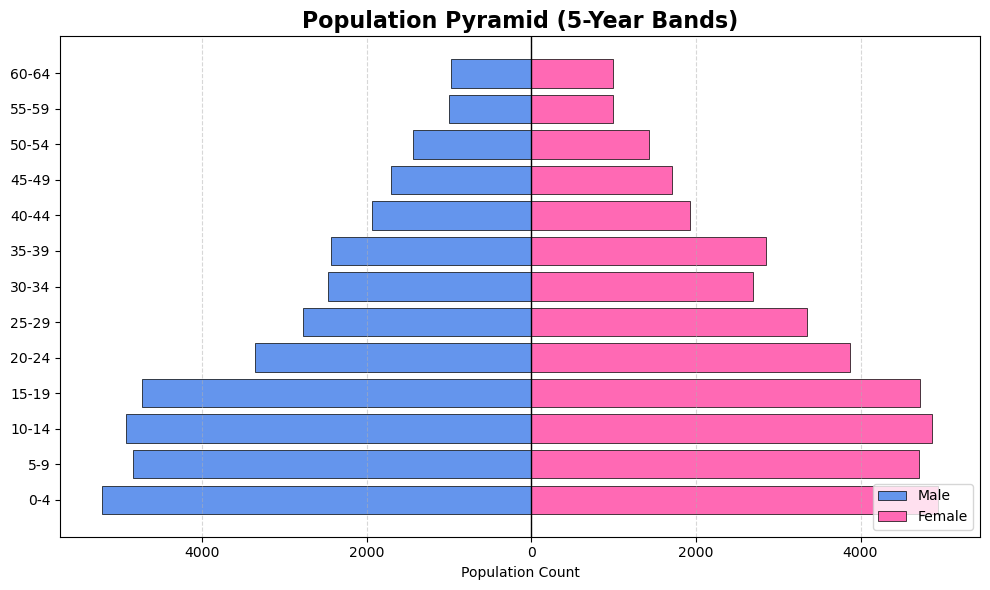

C:\Users\User\AppData\Local\Temp\ipykernel_8004\1693023918.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(abs(x))}' for x in xticks])


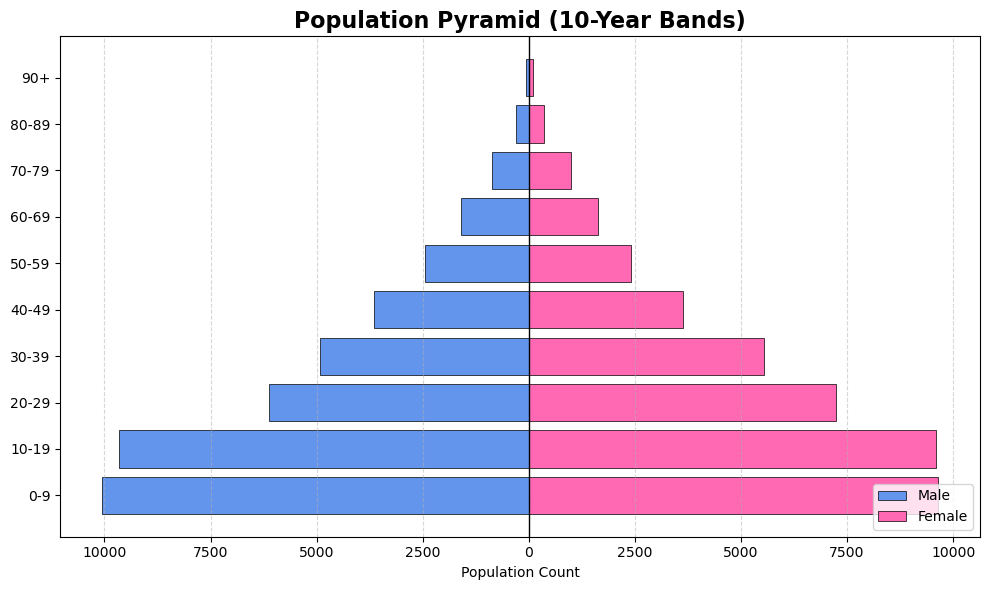

In [23]:

# 1. PREPARE DATA

# Create 10-Year Age Bands
df_final = df_final.copy()
 
bins_10 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_10 = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df_final['calculated_10yr_bands'] = pd.cut(df['b05_years'], bins=bins_10, labels=labels_10, right=False)

# sort the 5-Year Bands 
# We define the order list so "5-9" doesn't accidentally come after "10-14"
order_5yr = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', 
             '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

# 2. DEFINE PLOTTING FUNCTION
def plot_pyramid(dataframe, age_col, title, sort_order=None):
    # 1. Group data by Age and Sex
    # We use .size() to count the number of rows
    pyramid = dataframe.groupby([age_col, 'sex'], observed=False).size().unstack(fill_value=0)
    
    # Check if 'Male' and 'Female' columns exist (in case data is incomplete)
    if 'Male' not in pyramid.columns: pyramid['Male'] = 0
    if 'Female' not in pyramid.columns: pyramid['Female'] = 0

    # 2. Sort the index (Age groups)
    if sort_order:
        # Filter only categories that actually exist in the data to avoid errors
        existing_cats = [x for x in sort_order if x in pyramid.index]
        pyramid = pyramid.loc[existing_cats]
    else:
        pyramid = pyramid.sort_index()

    # 3. Prepare Plotting Variables
    y = np.arange(len(pyramid))
    males = pyramid['Male'] * -1  # Make Male counts negative to plot to the left
    females = pyramid['Female']
    age_labels = pyramid.index

    # 4. Draw the Chart
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot Bars
    ax.barh(y, males, color='cornflowerblue', label='Male', edgecolor='black', linewidth=0.5)
    ax.barh(y, females, color='hotpink', label='Female', edgecolor='black', linewidth=0.5)

    # 5. Formatting
    ax.set_yticks(y)
    ax.set_yticklabels(age_labels)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Population Count')
    ax.legend(loc='lower right')
    
    # Draw a center line
    ax.axvline(0, color='black', linewidth=1)

    # Fix X-axis labels (convert negative numbers back to positive strings)
    xticks = ax.get_xticks()
    ax.set_xticklabels([f'{int(abs(x))}' for x in xticks])

    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot 1: 5-Year Age Bands
plot_pyramid(df_final, 'age_cat_5yrbands', 'Population Pyramid (5-Year Bands)', sort_order=order_5yr)

# Plot 2: 10-Year Age Bands
plot_pyramid(df_final, 'calculated_10yr_bands', 'Population Pyramid (10-Year Bands)')

Text(0, 0.5, 'Count')

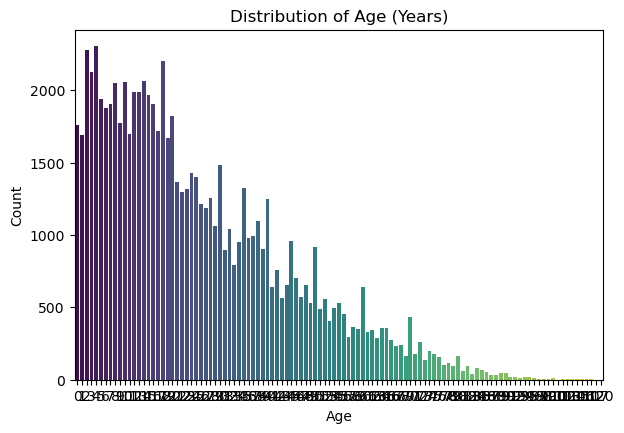

In [24]:
plt.figure(figsize=(15, 10))

# Plot 1: Age Distribution
plt.subplot(2, 2, 1)
# We drop NA specifically for the plot to avoid errors in plotting
sns.countplot(x='b05_years', data=df.dropna(subset=['b05_years']), palette='viridis')
plt.title('Distribution of Age (Years)')
plt.xlabel('Age')
plt.ylabel('Count')

## ii) Age Distribution(under 65,5-year groups)

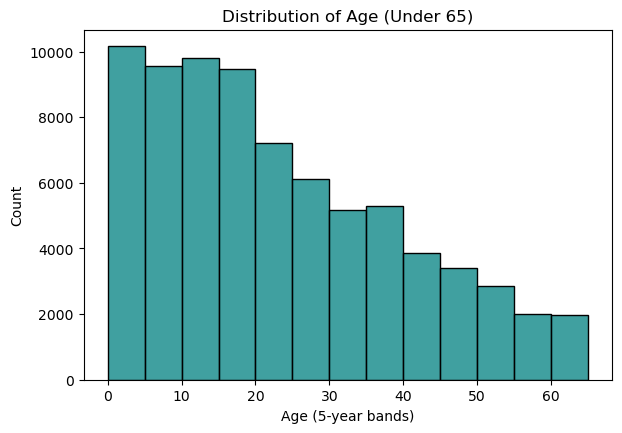

In [25]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)

# Drop empty rows and keep only age < 65
filtered_data = df.dropna(subset=['b05_years'])
filtered_data = filtered_data[filtered_data['b05_years'] < 65]

# plot Histogram
sns.histplot(
    data=filtered_data, 
    x='b05_years', 
    binwidth=5,        
    binrange=(0, 65),  
    color='teal',      
    edgecolor='black'  
)

plt.title('Distribution of Age (Under 65)')
plt.xlabel('Age (5-year bands)')
plt.ylabel('Count')
#plt.savefig("Age Distribution")

plt.show()

* The large part of the population is 30 and below. From there, the numbers begin to decrease.

## iii) A plot showing the education levels and attendance distributionm

Text(0, 0.5, 'Education Status')

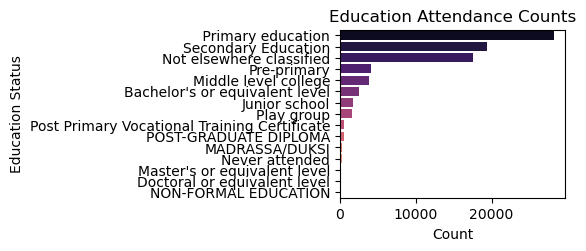

In [26]:
# Education Attendance level
plt.subplot(2, 2, 2)
# Order by count 
order_edu = df['edu_attendance'].value_counts().index
sns.countplot(y='edu_attendance', data=df, order=order_edu, palette='magma')
plt.title('Education Attendance Counts')
plt.xlabel('Count')
plt.ylabel('Education Status')
#plt.savefig("education vs attendance")

From above , there are most people in the lower levels of education, ie, primary education and Secondary education.
However as we go to higher levels of education, ie middle level college Bachelor's degree.

## iv) Distribution of Age by Education level

Text(0, 0.5, 'Education Status')

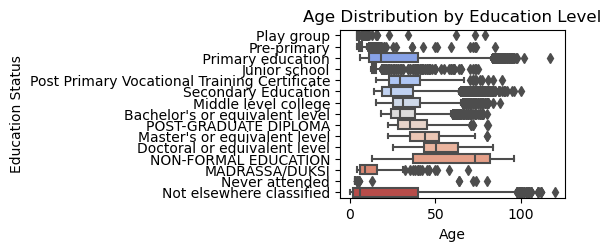

In [27]:
plt.subplot(2, 2, 3)
sns.boxplot(x='b05_years', y='edu_attendance', data=df, palette='coolwarm')
plt.title('Age Distribution by Education Level')
plt.xlabel('Age')
plt.ylabel('Education Status')
#plt.savefig("Age by Education level")

From the boxplot above, 
Higher Education (College to PhD): As you move down the list to `Bachelor's`, `Master's`, and `Doctoral degrees`, the median age (the line inside the box) shifts significantly to the right.
This shows that It takes time to accumulate these degrees. For example, the median age for a Doctoral degree holder appears to be around 45–50 years old, whereas a Bachelor's holder has a median age around 30.

# Conclusion
1. The large part of the population is 30 and below. From there, the numbers begin to decrease.
2. there are most people in the lower levels of education, ie, primary education and Secondary education.
However as we go to higher levels of education, ie middle level college Bachelor's degree.
3. It takes time to accumulate these degrees. For example, the median age for a Doctoral degree holder appears to be around 45–50 years old, whereas a Bachelor's holder has a median age around 30.
4. The large part of the population above age 40 has informal education

# Recommendations
The Government  should mainly look forward to:
1. Promote Technical & Vocational Training (TVET) to Bridge the "Education Drop-off"
2. Implement "Recognition of Prior Learning" (RPL) for the Older Workforce
3. Accelerate Flexible Learning Pathways for Higher Education
4. Capitalize on the "Demographic Dividend" through Job Creation